# ISM Project 

Next steps to take: 
1. Get the cluster for all the Chicago bulls. 
2. Get the cluster for the winning teams of the past 20 years
3. See how the average cluster compares to the position of the GSW and the Bulls, 
4. See the composition of the players in particular clusters. 
5. See which players exist in those clusters, and have the "best" impact so as to say. 

In [2]:
# input the years for which you want to access the data
years = [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999] 

In [3]:
# url for the teams in general 
Teams = ["CHI"] # A list of the teams
url_start = "https://www.basketball-reference.com/teams/" + Teams[0] + "/{}.html"


In [4]:
# # gets you the data and stores it in the Storage file 
# # This is so we dont DDoS the website
# import requests

# for year in years: 
#     url = url_start.format(year)
#     data = requests.get(url)
#     f = open("Storage/{}.html".format(year), "w+", encoding="utf-8")
#     f.write(data.text)
# # Uncomment only when years changes

In [5]:
# select dataframe based on the title 
# Adding a year column so we know which year it is 

pergame_table = []
import pandas as pd 
from bs4 import BeautifulSoup

for i in years:
    with open("Storage/{}.html".format(i), encoding = "utf-8") as f:  
        page = f.read()
        soup = BeautifulSoup(page, "html.parser") # creates a parser class that will help us extract the html code from the page
        pergame = soup.find(id="per_game") # Reads data from the per_game id. 
        pd.read_html(str(pergame))[0]
        df = pd.read_html(str(pergame))[0]
        df.insert(0, "Year", i)
        # append the data frame to a list so that we have a list of dataframes for the pergame data
        pergame_table.append(df)

In [6]:
print("These are the different stats that we now have access to: \n \n", df.columns) 

These are the different stats that we now have access to: 
 
 Index(['Year', 'Rk', 'Unnamed: 1', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS/G'],
      dtype='object')


In [7]:
# Functino to easily find the relavent stats that are required and return it as a dataframe
# What we ideally need is tha

def FindStats(df): 
    names = df["Unnamed: 1"]
    FG = df["FG"]
    Assist = df["AST"]
    Blocks = df["BLK"]
    pointsPerGame = df["PTS/G"]
    Rebounds = df["TRB"]
    year = df["Year"]
    dict = {"Year": year, "Names": names, "Field Goals": FG, "Assists": Assist, "Points":pointsPerGame,
     "Blocks": Blocks, "Rebounds": Rebounds}
    return pd.DataFrame(dict)

In [17]:
newpd = pd.concat(pergame_table)
newpd

,Year,Rk,Unnamed: 1,Age,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G
0,1991,1,Michael Jordan,27,82,82,37.0,12.1,22.4,0.539,...,0.851,1.4,4.6,6.0,5.5,2.7,1.0,2.5,2.8,31.5
1,1991,2,Scottie Pippen,25,82,82,36.8,7.3,14.1,0.520,...,0.706,2.0,5.3,7.3,6.2,2.4,1.1,2.8,3.3,17.8
2,1991,3,Horace Grant,25,78,76,33.9,5.1,9.4,0.547,...,0.711,3.4,5.0,8.4,2.3,1.2,0.9,1.2,2.6,12.8
3,1991,4,Bill Cartwright,33,79,79,28.8,4.0,8.2,0.490,...,0.697,2.1,4.0,6.2,1.6,0.4,0.2,1.4,2.1,9.6
4,1991,5,John Paxson,30,82,82,24.0,3.9,7.0,0.548,...,0.829,0.2,0.9,1.1,3.6,0.8,0.0,0.8,1.7,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1999,11,Cory Carr,23,42,7,14.9,1.7,5.1,0.329,...,0.750,0.2,1.0,1.2,1.6,0.5,0.2,1.1,1.6,4.1
11,1999,12,Bill Wennington,35,38,3,11.9,1.6,4.7,0.348,...,0.818,0.5,1.6,2.1,0.5,0.3,0.3,0.4,2.1,3.8
12,1999,13,Keith Booth,24,39,4,11.1,1.3,3.9,0.325,...,0.500,0.6,1.7,2.4,1.0,0.6,0.3,1.0,1.5,3.1
13,1999,14,Corey Benjamin,20,31,1,10.3,1.4,3.8,0.376,...,0.675,0.5,0.8,1.3,0.3,0.4,0.3,0.7,1.5,3.8


/tmp/ipykernel_6180/3791991109.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(A["Names"], rotation = 90)


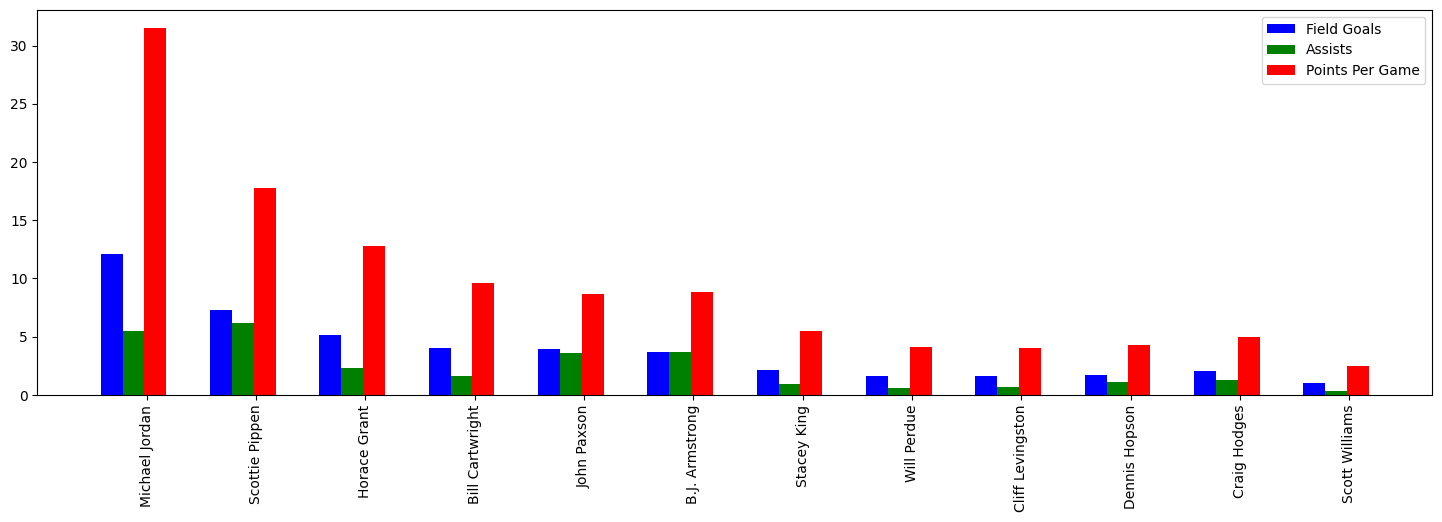

In [10]:
# Lets me plot the graph in a way that I can represt the data for the people quite easily
# Plots the data for everyone in the team
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(A['Field Goals'])) 
x = x -1

f, ax = plt.subplots(figsize=(18,5))

ax.bar(x-0.2, A["Field Goals"], width=0.2, color='b', align='center', label = "Field Goals")
ax.bar(x, A["Assists"], width=0.2, color='g', align='center', label = "Assists")
ax.bar(x+0.2, A["Points"], width=0.2, color='r', align='center', label = "Points Per Game")
ax.set_xticklabels(A["Names"], rotation = 90)
start, end = ax.get_xlim()
stepsiassiste = 1
ax.xaxis.set_ticks(np.arange(start + 1, end, stepsiassiste))

ax.legend()

In [11]:
# Lets plot the data where it's easy 

def PlayerData(name, pergame_table): # Takes in the player name and a list of dataframes
   # pg = pergame_table[0]
   pg = pergame_table
   res = pg.loc[pg['Unnamed: 1'] == name]
   for i in range(1, len(pergame_table)):
      pg = pergame_table[i]
      a = pg.loc[pg['Unnamed: 1'] == name]
      res = pd.concat([res, a])
   return res # returns the ones with all the values in them 

mj = PlayerData("Michael Jordan", pergame_table)
sp = PlayerData("Scottie Pippen", pergame_table)

n = pergame_table[0]
NameList = n["Unnamed: 1"]

playerlist = []
for i in NameList: 
   playerlist.append(PlayerData(str(i), pergame_table))

In [12]:
Years = []
fg = []
names = []
assist = []
ppg = []
for i in playerlist: 
    pg = FindStats(i)
    Years.append(pg["Year"])
    fg.append(pg["Field Goals"])
    names.append(pg["Names"])
    assist.append(pg["Assists"])
    ppg.append(pg["Points"])

In [13]:
# f, ax = plt.subplots(figsize=(18,5))
# for k in range(len(playerlist)): 
#     ax.plot(Years[k], ppg[k], label = np.asarray(names[k])[0])
#     ax.scatter(Years[k], ppg[k])


# ax.legend()



Text(0.5, 0, 'Rebounds')

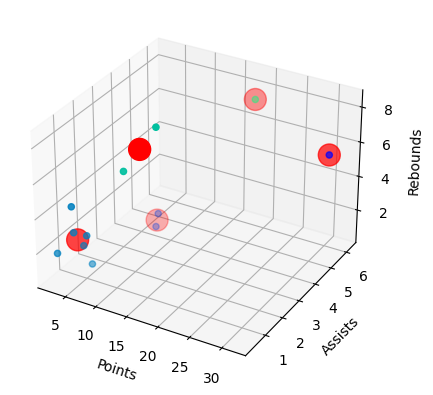

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy
from sklearn.cluster import KMeans

dict = {"Points": A["Points"], "Assists": A["Assists"],  "Rebounds": A["Rebounds"]}

df = pd.DataFrame(dict)

X = list(zip(A["Points"],A["Assists"], A["Rebounds"]))

km = KMeans(5)
clusts = km.fit_predict(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

km.cluster_centers_ # This gives me the position of the clusters for each part

scatter = ax.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            km.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(df['Points'],df['Assists'], df['Rebounds'],
                     c=clusts,s=20, cmap='winter')

ax.set_xlabel("Points")
ax.set_ylabel("Assists")
ax.set_zlabel("Rebounds")
